## Wine Quality Prediction

In [292]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
df = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Winequality_Pred\datasets_4458_8204_winequality_red.csv')

In [294]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [295]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [296]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [298]:
# Check if there is any column present with single value
for i in df.columns:
    if len(df[i].value_counts())==1:
        print(i)

In [299]:
# Take a copy of the dataset
df1 = df.copy()

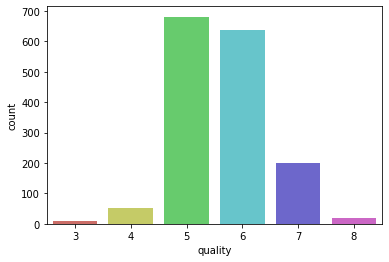

<Figure size 432x288 with 0 Axes>

In [300]:
#Check the quality column
sns.countplot(x='quality',data=df1,palette='hls')
plt.show()
plt.savefig('count_plot')

create a column based on the quality of the wine. If >= 3 and <= 4 then low, if =5 and <=6 then medium and >6 high

In [301]:
df1['Category']= df1['quality'].apply(lambda x:0 if x<=4 else (1 if x>=5 and x<=6 else 2))

In [302]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [303]:
all_numeric = df1.iloc[:,:-2]

In [304]:
all_numeric.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [305]:
cor = all_numeric.corr()

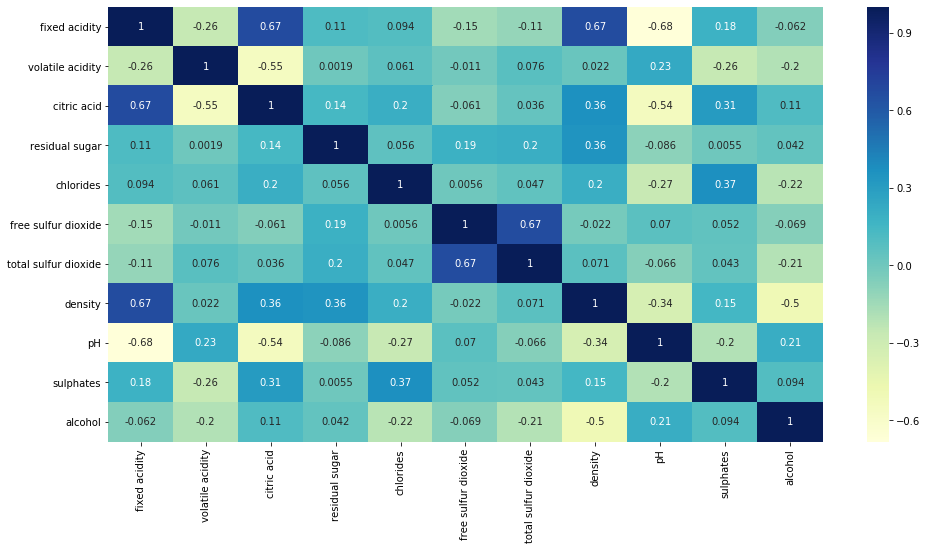

In [306]:
# Figure size
plt.figure(figsize=(16,8))
# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [307]:
df1.drop('quality',axis=1,inplace = True)

In [308]:
X = df1.drop('Category',axis=1)
y = df1['Category']


In [309]:
print(X.shape,Y.shape)

(1599, 11) (1599,)


In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1119, 11)
X_test: (480, 11)
y_train: (1119,)
y_test: (480,)


## Logistic regression

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\91973\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:
y_pred = logreg.predict(X_test)

In [314]:
metrics.accuracy_score( y_test, y_pred)

0.8354166666666667

In [315]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1
                           )
grid_search = grid_search.fit(X_train, y_train)

C:\Users\91973\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [316]:
accuracy = grid_search.best_score_

In [317]:
# the grid search accuracy is:
accuracy

0.8391248391248392

In [318]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2'}

In [319]:
logreg = LogisticRegression(C= 100, penalty= 'l2')

In [320]:
logreg.fit(X_train, y_train)

C:\Users\91973\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [321]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)

In [322]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [323]:
accuracy

0.8395833333333333

## Random Forest

In [324]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1119, 11)
X_test: (480, 11)
y_train: (1119,)
y_test: (480,)


In [325]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [326]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [327]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [328]:
# Making predictions
predictions = rfc.predict(X_test)

In [329]:
print(metrics.accuracy_score(y_test,predictions))

0.8708333333333333


#### Hyperparameter Tuning

In [330]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [331]:
# Maxdepth
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [332]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126305,0.004947,0.007579,0.001198,2,{'max_depth': 2},0.830357,0.821429,0.821429,0.821429,...,0.825745,0.005416,4,0.830168,0.824581,0.825698,0.827933,0.833705,0.828417,0.003267
1,0.182207,0.012237,0.007940,0.000545,7,{'max_depth': 7},0.834821,0.834821,0.861607,0.861607,...,0.849872,0.012429,3,0.941899,0.947486,0.939665,0.934078,0.929688,0.938563,0.006178
2,0.193435,0.005540,0.008193,0.000391,12,{'max_depth': 12},0.839286,0.834821,0.866071,0.870536,...,0.860618,0.021247,1,0.993296,0.994413,0.988827,0.992179,0.988839,0.991511,0.002298
3,0.240928,0.034677,0.012967,0.004277,17,{'max_depth': 17},0.843750,0.825893,0.861607,0.875000,...,0.858828,0.022028,2,1.000000,1.000000,0.998883,1.000000,1.000000,0.999777,0.000447


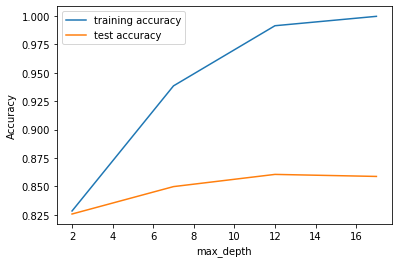

In [333]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The train set accuracy keeps on increasing which leads to an overfit but, for test set, accuracy drops after a specific point

In [334]:
# n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [335]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147407,0.007215,0.007327,0.000535,100,{'n_estimators': 100},0.839286,0.848214,0.848214,0.848214,...,0.843602,0.005884,1,0.884916,0.877095,0.875978,0.874860,0.866071,0.875784,0.006006
1,0.807686,0.046002,0.035956,0.005582,500,{'n_estimators': 500},0.839286,0.848214,0.839286,0.848214,...,0.840919,0.006928,4,0.882682,0.877095,0.873743,0.880447,0.869420,0.876677,0.004727
2,1.441255,0.041331,0.060493,0.003994,900,{'n_estimators': 900},0.843750,0.843750,0.843750,0.848214,...,0.842709,0.004648,3,0.878212,0.880447,0.872626,0.878212,0.871652,0.876230,0.003452
3,2.085173,0.099004,0.085296,0.001383,1300,{'n_estimators': 1300},0.839286,0.848214,0.852679,0.848214,...,0.843598,0.008243,2,0.879330,0.878212,0.875978,0.874860,0.870536,0.875783,0.003063


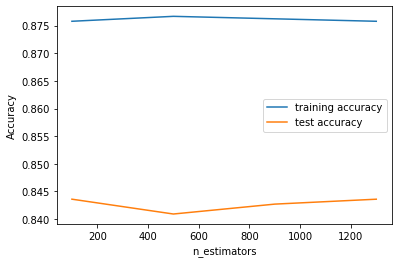

In [336]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [337]:
# max_features
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,30,36,40,45,50,60,64,72,90,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

C:\Users\91973\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\91973\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\91973\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\91973\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [338]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.173526,0.018838,0.007391,0.000501,4,{'max_features': 4},0.834821,0.843750,0.852679,0.852679,...,0.844499,0.007256,2,0.881564,0.888268,0.877095,0.883799,0.873884,0.880922,0.005037
1,0.215049,0.018267,0.008020,0.002084,8,{'max_features': 8},0.848214,0.848214,0.870536,0.839286,...,0.848963,0.011561,1,0.891620,0.901676,0.887151,0.886034,0.887277,0.890751,0.005786
2,0.033395,0.000866,0.000000,0.000000,14,{'max_features': 14},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.035383,0.001108,0.000000,0.000000,20,{'max_features': 20},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.035711,0.002786,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


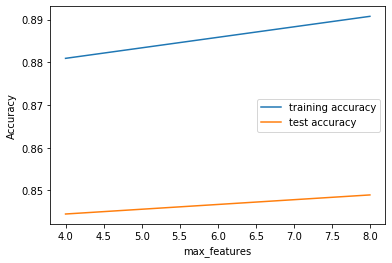

In [339]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [340]:
# min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [341]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154256,0.011590,0.007794,0.000412,100,{'min_samples_leaf': 100},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
1,0.130421,0.003137,0.007600,0.000489,150,{'min_samples_leaf': 150},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
2,0.147210,0.017849,0.007786,0.000402,200,{'min_samples_leaf': 200},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
3,0.137399,0.022036,0.008780,0.000994,250,{'min_samples_leaf': 250},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
4,0.119474,0.004330,0.007181,0.000399,300,{'min_samples_leaf': 300},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825


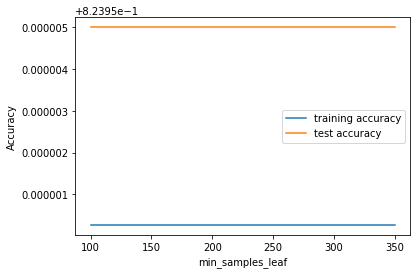

In [342]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [343]:
# min_samples_split
# GridSearchCV to find optimal min_sample_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [344]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.170561,0.015334,0.008154,0.000958,200,{'min_samples_split': 200},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
1,0.172534,0.022408,0.007771,0.000418,250,{'min_samples_split': 250},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
2,0.146413,0.003656,0.007998,0.000048,300,{'min_samples_split': 300},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
3,0.160342,0.021488,0.008377,0.001353,350,{'min_samples_split': 350},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825
4,0.129715,0.002127,0.007786,0.000425,400,{'min_samples_split': 400},0.825893,0.821429,0.821429,0.821429,...,0.823955,0.003308,1,0.823464,0.824581,0.824581,0.824581,0.822545,0.82395,0.000825


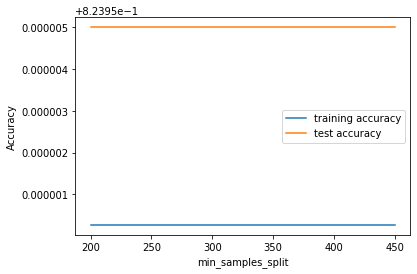

In [345]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [346]:
# Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [347]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   24.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [348]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8239499553172475 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [351]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [352]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [353]:
# predict
predictions = rfc.predict(X_test)

In [354]:
# accuracy score
rfc.score(X_test,y_test)

0.8270833333333333